# Svm Implementation Through The Typical Ml Life Cycle 

In [1]:
# mashroom dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [6]:
# load the dataset
dataset=pd.read_csv("./mushrooms.csv")


In [11]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Exploratery Data Anaylysis

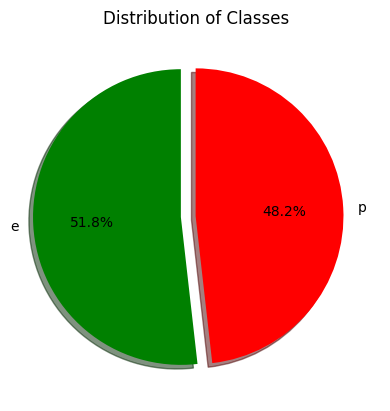

In [16]:
counts=dataset['class'].value_counts()
counts
plt.pie(counts,labels=counts.index,autopct='%1.1f%%',colors=['green','red'],startangle=90,shadow=True,explode=(0.1,0))
plt.title('Distribution of Classes')
plt.show()


# Cap Shapes

/var/folders/0w/tpzkxmp574x07hybpr2xz6c00000gn/T/ipykernel_77198/3814555230.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  splots.set_xticklabels(['conical','convex','flat','knobbed','sunken'])


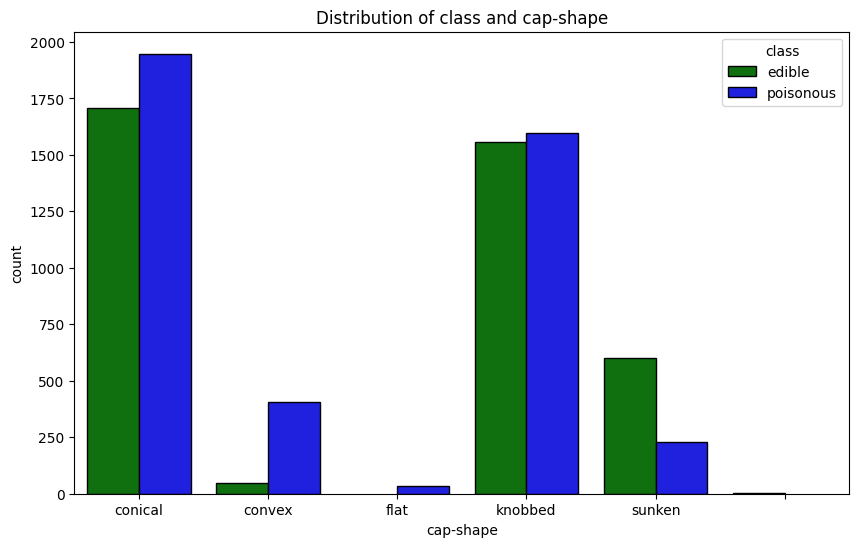

In [27]:
plt.figure(figsize=(10,6))
splots=sns.countplot(data=dataset,x='cap-shape',hue='class',palette=['green','blue'],edgecolor='black')
splots.set_xticklabels(['conical','convex','flat','knobbed','sunken'])
plt.legend(title='class',labels=['edible','poisonous'])
plt.xlabel('cap-shape')
plt.ylabel('count')
plt.title('Distribution of class and cap-shape')
plt.show()


# Cap Surfaces

/var/folders/0w/tpzkxmp574x07hybpr2xz6c00000gn/T/ipykernel_77198/1764501738.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  splots.set_xticklabels(['brown','grey','red','Buff','pink','Cinnamon','Purpole',"green",'yellow','pink','purple'])


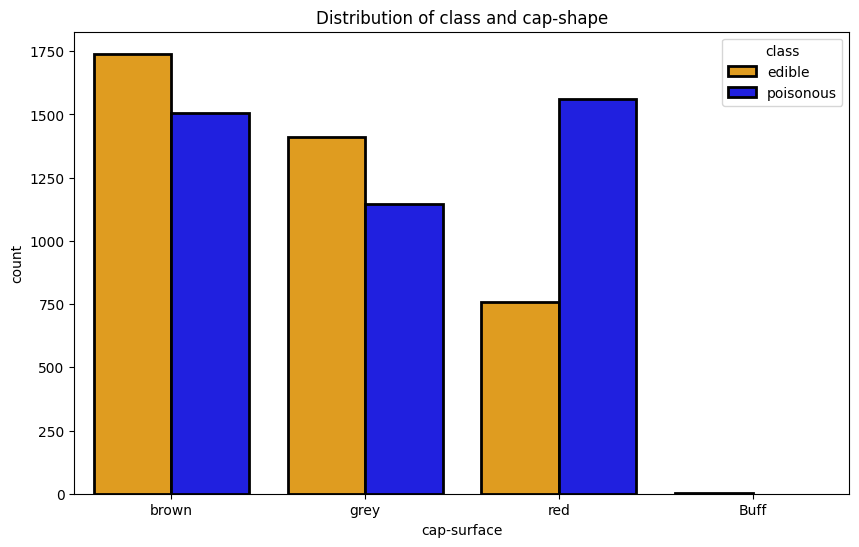

In [33]:
# doing the visualization of cap surfaces
plt.figure(figsize=(10,6))
splots=sns.countplot(data=dataset,x='cap-surface',hue='class',order=dataset['cap-surface'].value_counts().index,palette=['orange','blue'],edgecolor='black',linewidth=2)
splots.set_xticklabels(['brown','grey','red','Buff','pink','Cinnamon','Purpole',"green",'yellow','pink','purple'])
plt.legend(title='class',labels=['edible','poisonous'],loc='upper right')
plt.xlabel('cap-surface')
plt.ylabel('count')
plt.title('Distribution of class and cap-shape')
plt.show()

# Label Encoding

In [36]:
# label ecoding 
x_enc=dataset.drop('class',axis=1).copy()
for col in x_enc.columns:
    le=LabelEncoder()
    x_enc[col]=le.fit_transform(x_enc[col])

y_enc=dataset['class'].copy()
le=LabelEncoder()
y_enc=le.fit_transform(y_enc)
x_enc.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
# splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x_enc,y_enc,test_size=0.2,random_state=42)
# here randon_state is used for reproducibility means that same split will be done every time instead of different
# of splitting it every time randomly
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
x_train.head()

(6499, 22) (1625, 22) (6499,) (1625,)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
6515,5,2,4,0,2,1,0,1,0,1,...,2,7,7,0,2,1,0,7,4,4
6141,2,3,2,0,8,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,2
2764,2,0,4,1,5,1,0,0,9,1,...,2,3,6,0,2,1,4,3,4,0
438,0,3,9,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,3


In [ ]:
# building the SVM model 
svc=SVC(kernel=)

In [45]:
svc.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [46]:
svc.score(x_test,y_test)

0.9926153846153846